In [ ]:
import pandas as pd
import numpy as np
import openweathermapy.core as owm
from citipy import citipy as cp
from config import api_key
from datetime import datetime
import matplotlib.pyplot as plt

#For 3D scatterplot
from mpl_toolkits.mplot3d import Axes3D 



In [2]:
#Function to return City name
def get_city(vlat,vlon):
    geo = cp.nearest_city(vlat,vlon)
    return geo.city_name.title()

In [3]:
city_count=1000 # How many cities need to generate
city=[]
# Creating loop to add unique cities in the list
while (len(city) <city_count):
    city_name = get_city(np.random.uniform(low=-66, high=66),np.random.uniform(low=-180, high=180))
    if(city_name in city):
        #Printing inital errors.
        if(len(city)<50):
            print(f"{city_name} already exists in the list. Generating new ")
        #Increasing probabilty of unique city by adding two different random function
        city_name = get_city(np.random.randint(-40,40),np.random.randint(-120,120))
    else:
        city.append(city_name)

#print(len(city))
#Creating DataFrame for city
cities_df=pd.DataFrame({"City":city})
cities_df["Latitude"]=""
cities_df["Longitude"]=""
cities_df["Country Code"]=""
cities_df["Max Temp"]=""
cities_df["Humidity"]=""
cities_df["Cloudiness"]=""
cities_df["Wind Speed (mph)"]=""
cities_df["Date"]=""
cities_df["Time"]=""
cities_df.head()

Taolanaro already exists in the list. Generating new 
Rikitea already exists in the list. Generating new 
Hermanus already exists in the list. Generating new 
Hithadhoo already exists in the list. Generating new 
Busselton already exists in the list. Generating new 
Albany already exists in the list. Generating new 
Kapaa already exists in the list. Generating new 
Castro already exists in the list. Generating new 
Albany already exists in the list. Generating new 
Kapaa already exists in the list. Generating new 
Saint-Philippe already exists in the list. Generating new 
Rikitea already exists in the list. Generating new 
Hithadhoo already exists in the list. Generating new 
Taolanaro already exists in the list. Generating new 
Jamestown already exists in the list. Generating new 


,City,Latitude,Longitude,Country Code,Max Temp,Humidity,Cloudiness,Wind Speed (mph),Date,Time
0,Bethel,,,,,,,,,
1,Yeniseysk,,,,,,,,,
2,Albany,,,,,,,,,
3,Biak,,,,,,,,,
4,Taolanaro,,,,,,,,,


In [4]:
settings = {"units": "imperial", "appid": api_key}
for index,row in cities_df.iterrows():
    try:
        weather_city = owm.get_current(row["City"], **settings)
        #Adding if condition to print initial 5 records
        if(index <=5):
            print(weather_city)
        cities_df.loc[index, "Latitude"]=weather_city["coord"]["lat"]  
        cities_df.loc[index, "Longitude"]=weather_city["coord"]["lon"] 
        cities_df.loc[index, "Wind Speed (mph)"]=weather_city['wind']['speed'] 
        cities_df.loc[index, "Max Temp"]= weather_city["main"]["temp_max"]
        cities_df.loc[index, "Humidity"]=weather_city["main"]["humidity"] 
        cities_df.loc[index, "Cloudiness"]=weather_city["clouds"]["all"] 
        cities_df.loc[index,"Date"]=datetime.fromtimestamp(weather_city["dt"]).strftime("%m/%d/%Y")
        cities_df.loc[index,"Time"]=datetime.fromtimestamp(weather_city["dt"]).strftime("%I:%M:%S")
        cities_df.loc[index,"Country Code"]=weather_city["sys"]["country"] 
    except:
        #Printing initial records only.
        if(index <100):
            print(f"Weather not available for city {cities_df.loc[index,'City']}. Deleting it from DataFrame")
        #Removing cities for which weather is not available in weathermapi
        cities_df.drop(index,inplace=True)
        continue
#Saving data in CSV file
cities_df.to_csv("weather for cities.csv",index=False,encoding='utf-8')
cities_df.head()   

{'coord': {'lon': -161.76, 'lat': 60.79}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 35.6, 'pressure': 1035, 'humidity': 64, 'temp_min': 35.6, 'temp_max': 35.6}, 'visibility': 16093, 'wind': {'speed': 19.46, 'deg': 20}, 'clouds': {'all': 1}, 'dt': 1522641180, 'sys': {'type': 1, 'id': 28, 'message': 0.0046, 'country': 'US', 'sunrise': 1522685184, 'sunset': 1522733760}, 'id': 5880568, 'name': 'Bethel', 'cod': 200}
{'coord': {'lon': 92.17, 'lat': 58.45}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 23.71, 'pressure': 1021.75, 'humidity': 68, 'temp_min': 23.71, 'temp_max': 23.71, 'sea_level': 1043.43, 'grnd_level': 1021.75}, 'wind': {'speed': 6.62, 'deg': 231.01}, 'clouds': {'all': 32}, 'dt': 1522644023, 'sys': {'message': 0.0061, 'country': 'RU', 'sunrise': 1522624590, 'sunset': 1522672482}, 'id': 1485997, 'name': 'Yeniseysk'

,City,Latitude,Longitude,Country Code,Max Temp,Humidity,Cloudiness,Wind Speed (mph),Date,Time
0,Bethel,60.79,-161.76,US,35.6,64,1,19.46,04/01/2018,08:53:00
1,Yeniseysk,58.45,92.17,RU,23.71,68,32,6.62,04/01/2018,09:40:23
2,Albany,42.65,-73.75,US,30.2,54,40,3.15,04/01/2018,08:54:00
3,Biak,-0.91,122.88,ID,84.01,88,36,2.71,04/01/2018,09:40:32
5,Busselton,-33.64,115.35,AU,69.58,95,0,14.54,04/01/2018,09:29:43


In [5]:
cities_df.to_csv("weather for cities.csv",index=False,encoding='utf-8')

In [6]:
#Scatter plot can be generated for numeric values. Converting to numeric
cities_df['Latitude']=pd.to_numeric(cities_df['Latitude'])
cities_df['Longitude']=pd.to_numeric(cities_df['Longitude'])
cities_df['Max Temp']=pd.to_numeric(cities_df['Max Temp'])
cities_df['Humidity']=pd.to_numeric(cities_df['Humidity'])
cities_df['Cloudiness']=pd.to_numeric(cities_df['Cloudiness'])
cities_df['Wind Speed (mph)']=pd.to_numeric(cities_df['Wind Speed (mph)'])

cities_df.count()

City                901
Latitude            901
Longitude           901
Country Code        901
Max Temp            901
Humidity            901
Cloudiness          901
Wind Speed (mph)    901
Date                901
Time                901
dtype: int64

In [7]:
#Since all scatter plots are based of Latitude. Creating function to draw
def ScatterPlot(plotfor):
    print(f"Latitude vs {plotfor} plot")
    with plt.style.context('seaborn-dark'):
        plt.figure(figsize=(14,10))
        plt.title(f"City Latitude vs {plotfor} ({cities_df['Date'][0]} {cities_df['Time'][0]})")
        plt.xlim(-90,90)
        plt.ylim(min(cities_df[plotfor])-10,max(cities_df[plotfor])+20)
        plt.xlabel("Latitude")
        plt.ylabel(plotfor)
        plt.grid(color='white', linestyle='-', linewidth=1)
        plt.scatter(cities_df["Latitude"], cities_df[plotfor],edgecolors="black", color="blue", alpha=.8)  
        plt.savefig(f"{plotfor}.png")


Latitude vs Max Temp plot


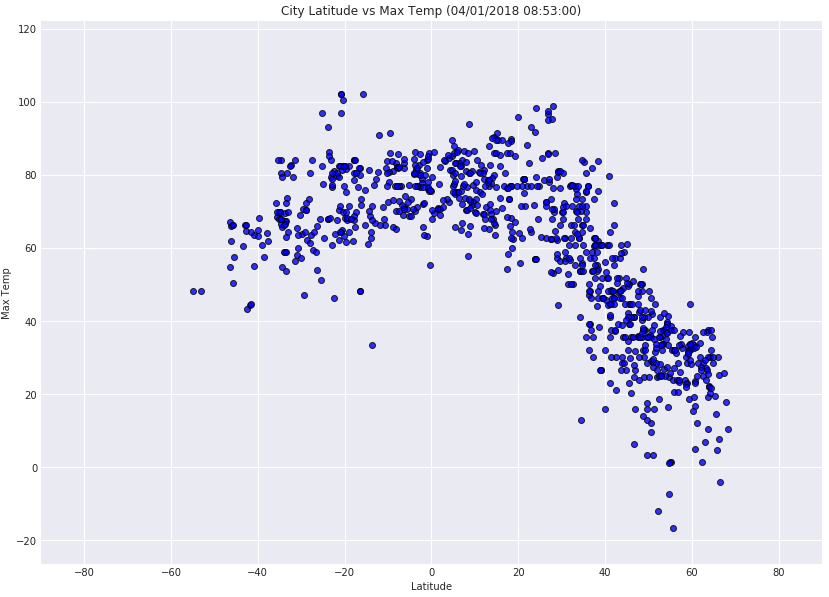

In [8]:
#Latitude vs Temperature Plot
ScatterPlot("Max Temp")

Latitude vs Humidity plot


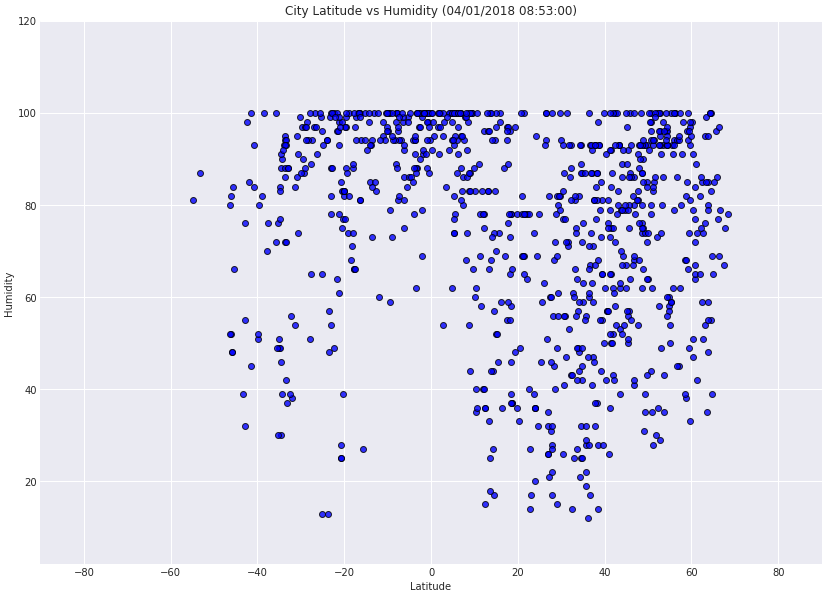

In [9]:
ScatterPlot("Humidity")

Latitude vs Cloudiness plot


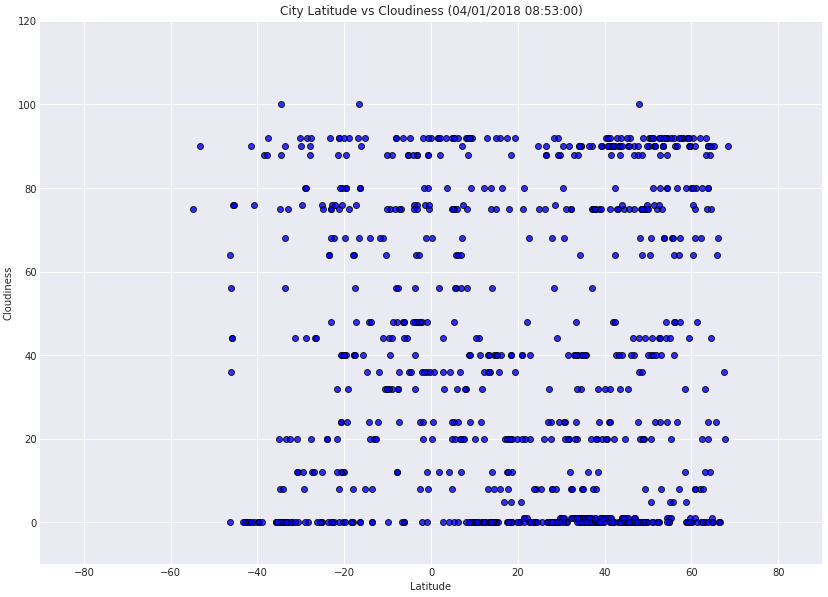

In [10]:
ScatterPlot("Cloudiness")

Latitude vs Wind Speed (mph) plot


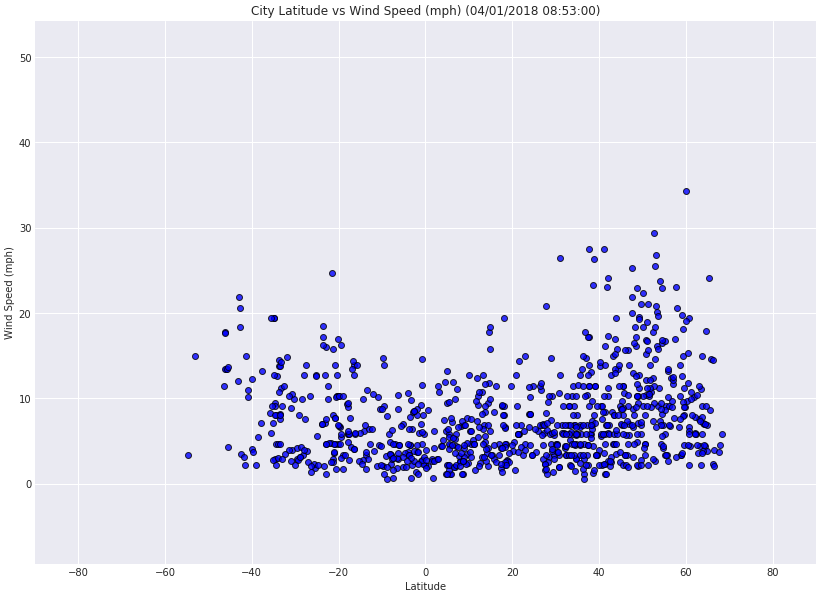

In [11]:
ScatterPlot("Wind Speed (mph)")

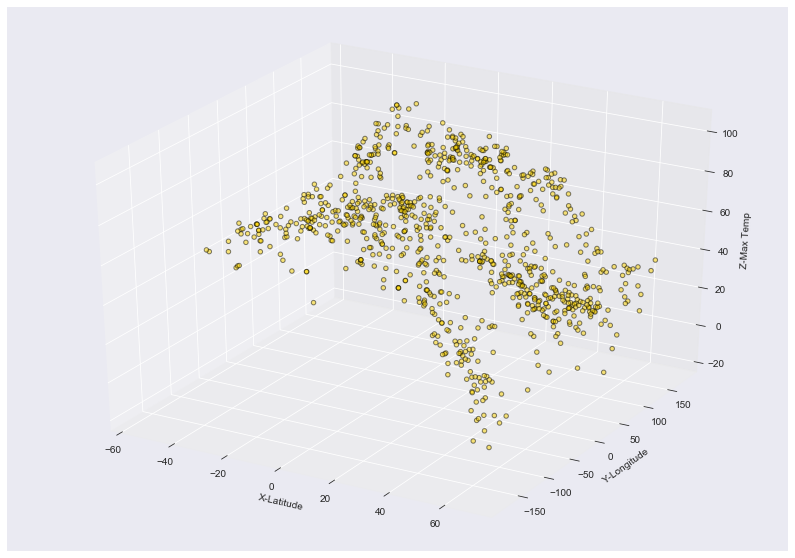

In [12]:
# Drawing 3D plot using Latitude and Longitude
fig = plt.figure(figsize=(14,10))
with plt.style.context('seaborn-dark'):
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(cities_df["Latitude"], cities_df["Longitude"], cities_df["Max Temp"], color="gold",edgecolor="k", alpha=.5)
    ax.set_xlabel('X-Latitude')
    ax.set_ylabel('Y-Longitude')
    ax.set_zlabel('Z-Max Temp')
    plt.show()